Convolución 2D (filtrado de imágenes)

Al igual que en las señales unidimensionales, las imágenes también se pueden filtrar con varios filtros de paso bajo (LPF), filtros de paso alto (HPF), etc. LPF ayuda a eliminar ruido, desenfocar imágenes, etc. Los filtros HPF ayudan a encontrar bordes en imágenes.

OpenCV proporciona una función cv.filter2D() para convolucionar un kernel con una imagen.

La operación funciona así: mantenga este núcleo por encima de un píxel, agregue los 25 píxeles debajo de este núcleo, tome el promedio y reemplace el píxel central con el nuevo valor promedio. Esta operación continúa para todos los píxeles de la imagen. Pruebe este código y compruebe el resultado:

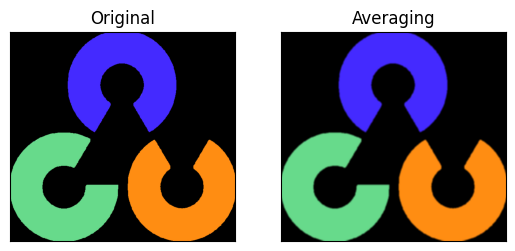

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/opencv-logo.png')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Imagen borrosa (suavizado de imagen)

La imagen borrosa se logra convolucionando la imagen con un núcleo de filtro de paso bajo. Es útil para eliminar el ruido. En realidad, elimina el contenido de alta frecuencia (por ejemplo, ruido, bordes) de la imagen. Entonces los bordes se difuminan un poco en esta operación (también existen técnicas de difuminado que no difuminan los bordes). OpenCV proporciona cuatro tipos principales de técnicas de desenfoque.

1. Promediando
Esto se hace convolucionando una imagen con un filtro de cuadro normalizado. Simplemente toma el promedio de todos los píxeles bajo el área del núcleo y reemplaza el elemento central. Esto se hace mediante la función cv.blur() o cv.boxFilter() . Consulte los documentos para obtener más detalles sobre el kernel. Deberíamos especificar el ancho y alto del kernel. Un filtro de caja normalizado de 3x3 se vería como el siguiente:

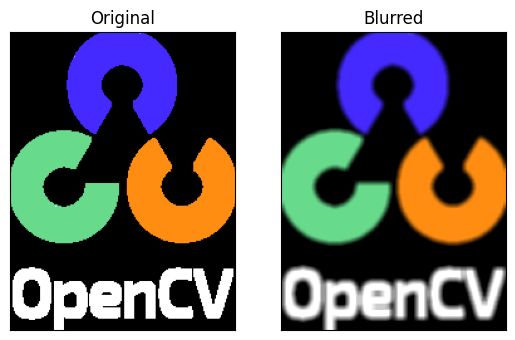

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('resources/opencv-logo-white.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2. Desenfoque gaussiano
En este método, en lugar de un filtro de caja, se utiliza un núcleo gaussiano. Se hace con la función cv.GaussianBlur() . Deberíamos especificar el ancho y alto del núcleo, que debe ser positivo e impar. También debemos especificar la desviación estándar en las direcciones X e Y, sigmaX y sigmaY respectivamente. Si solo se especifica sigmaX, sigmaY se considera igual que sigmaX. Si ambos se dan como ceros, se calculan a partir del tamaño del núcleo. El desenfoque gaussiano es muy eficaz para eliminar el ruido gaussiano de una imagen.

Si lo desea, puede crear un núcleo gaussiano con la función cv.getGaussianKernel() .

El código anterior se puede modificar para lograr un desenfoque gaussiano:

In [3]:
blur = cv.GaussianBlur(img,(5,5),0)

3. Desenfoque medio

Aquí, la función cv.medianBlur() toma la mediana de todos los píxeles bajo el área del núcleo y el elemento central se reemplaza con este valor mediano. Esto es muy eficaz contra el ruido entrecortado en una imagen. Curiosamente, en los filtros anteriores, el elemento central es un valor recién calculado que puede ser un valor de píxel en la imagen o un valor nuevo. Pero en el desenfoque medio, el elemento central siempre se reemplaza por algún valor de píxel en la imagen. Reduce el ruido de manera efectiva. El tamaño de su núcleo debe ser un número entero impar positivo.

En esta demostración, agregué un 50 % de ruido a nuestra imagen original y apliqué un desenfoque medio. Comprueba el resultado:

In [4]:
median = cv.medianBlur(img,5)

4. Filtrado bilateral

cv.bilateralFilter() es muy eficaz para eliminar el ruido y al mismo tiempo mantiene los bordes afilados. Pero el funcionamiento es más lento en comparación con otros filtros. Ya vimos que un filtro gaussiano toma la vecindad alrededor del píxel y encuentra su promedio ponderado gaussiano. Este filtro gaussiano es una función únicamente del espacio, es decir, los píxeles cercanos se consideran durante el filtrado. No considera si los píxeles tienen casi la misma intensidad. No considera si un píxel es un píxel de borde o no. Entonces también difumina los bordes, lo cual no queremos hacer.

El filtrado bilateral también requiere un filtro gaussiano en el espacio, pero un filtro gaussiano más que es función de la diferencia de píxeles. La función gaussiana del espacio garantiza que solo se consideren para el desenfoque los píxeles cercanos, mientras que la función gaussiana de diferencia de intensidad garantiza que solo se consideren para el desenfoque aquellos píxeles con intensidades similares a las del píxel central. Por lo tanto, preserva los bordes ya que los píxeles en los bordes tendrán una gran variación de intensidad.

El siguiente ejemplo muestra el uso de un filtro bilateral (para obtener detalles sobre los argumentos, visite los documentos).

In [5]:
blur = cv.bilateralFilter(img,9,75,75)